## EJECUTA ESTA CELDA PARA AUTENTICARTE CON TU CUENTA DE GMAIL

In [ ]:
from mooclib import *
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

### Entiende el siguiente dataset y la señal que extraemos del mismo

In [30]:
import pandas as pd
import pandas, numpy, theano, time
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [31]:
cop = pd.read_csv("data/eurcop.csv")
cop.head()

,Date,Rate,High (est),Low (est)
0,1999-09-06,2068.55,0.0,0.0
1,1999-09-07,2078.17,2103.0,2053.7
2,1999-09-08,2091.05,0.0,0.0
3,1999-09-09,2093.84,2118.6,2069.4
4,1999-09-10,2087.55,0.0,0.0


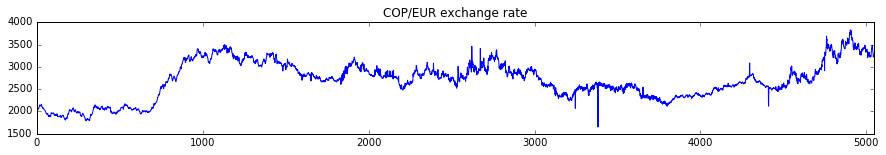

In [32]:
signal = cop.Rate.as_matrix()
plt.figure(figsize=(15,2))
plt.plot(signal)
plt.xlim([0, len(cop)])
plt.title("COP/EUR exchange rate")

## Ejercicio 1: Data normalization

Completa la siguiente función para:

1. Cargar los datos del histórico de la tasa de cambio peso/dólar
1. Usar un [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) para normalizar la columna `Rate` a valores entre 0 y 1

La función habrá de devolver un array numpy de con `shape` (5044,) con la columna `Rate` normalizada.

In [ ]:
def cop_normalized():
    from sklearn.preprocessing import MinMaxScaler
    import pandas as pd
    signal = ... # obten la columna Rate del dataset
    signal_normalized = ...
    return signal_normalized

import urllib, inspect
src1 = urllib.quote_plus(inspect.getsource(cop_normalized))

comprueba tu código

In [ ]:
s = cop_normalized()
print s.shape
plt.figure(figsize=(15,2))
plt.plot(s)
plt.xlim([0, len(s)]);

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS9_1 $src1

#### submit your answer (you must be connected to internet)


In [ ]:
!./run SUBMIT_SOLUTION PS9_1 $src1

## Ejercicio 2: Moving average

Completa la función siguiente para que, dada una señal $s$ y un tamaño de ventana $w$, genere una nueva señal que sea una versión suavizada de la orginal de forma que:

- $w[k] = \frac{1}{w}\sum_{i=k}^{k+w-1}s[i]$
- la nueva señal tenga $w$ elementos menos que la señal original

P.ej. si la señal original tiene `shape` (5000,), la señal suavizada ha de tener `shape` (4900,)

In [ ]:
def moving_average(signal, wsize):
    
    result = ....
    
    return result

import urllib, inspect
src2 = urllib.quote_plus(inspect.getsource(moving_average))

In [ ]:
s = cop_normalized()
w = 100
ms = moving_average(s, w)
print s.shape, ms.shape
plt.figure(figsize=(15,2))
plt.plot(s, alpha=.5, color="blue")
plt.plot(list(np.zeros(w)*np.nan)+list(ms), color="red")
plt.xlim([0, len(s)]);

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS9_2 $src2

#### submit your answer (you must be connected to internet)


In [ ]:
!./run SUBMIT_SOLUTION PS9_2 $src2

## Ejercicio 3: Building sequences

Completa la función siguiente para que, dada una señal $\in \mathbb{R}^n$ y una longidud de secuencia, construya una matriz con las secuencias consecutivas y superpuestas.

Por ejemplo, la siguiente señal

      [20 87 87 77 84 43  9 84 36 63]

con una longitud de secuencia igual 5, generaría la siguiente matriz:

        [[20 87 87 77 84]
         [87 87 77 84 43]
         [87 77 84 43  9]
         [77 84 43  9 84]
         [84 43  9 84 36]]

observa como los valores se van desplazando hacia la izquierda en filas consecutivas

In [ ]:
def make_seqs(s, seq_len):

    result = ...  

    return result

import urllib, inspect
src3 = urllib.quote_plus(inspect.getsource(make_seqs))

comprueba tu código y visualiza algunas secuencias de la señal cop/eur

In [ ]:
s = np.array([20, 87, 87, 77, 84, 43,  9, 84, 36, 63])
print make_seqs(s,5)

In [ ]:
s = cop_normalized()
ms = moving_average(s, 5)
x = make_seqs(ms, seq_len=100)
plt.figure(figsize=(10,2))
for i in range(10):
    plt.plot(x[i])

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS9_3 $src3

#### submit your answer (you must be connected to internet)


In [ ]:
!./run SUBMIT_SOLUTION PS9_3 $src3

## Ejercicio 4: Prepare data for RNN

Completa la siguiente función para que, dada una matriz como la resultante del ejercicio anterior, 

- Extraiga en `X` todas las columnas menos la última
- Extraiga en `y` la última columna
- Extraiga en `X_train` e `y_train` las primeras filas de `X` y componentes de `y` respectivamente según el porcentaje indicado en  `train_pct`
- Extraige en `X_test` e `y_test` el resto de datos.

Observa como, con esto, estamos creando un dataset para predecir el siguiente valor de una secuencia.

Por ejemplo, con las siguientes secuencias y un train_pct de 0.5:


        [[20 87 87 77 84]
         [87 87 77 84 43]
         [87 77 84 43  9]
         [77 84 43  9 84]
         [84 43  9 84 36]]
         
Estos serían los varlores de X_train e y_train

        [[20 87 87 77]
         [87 87 77 84]]
         
        [84 43]

Y estos los de X_test e y_test

        [[87 77 84 43]
         [77 84 43  9]
         [84 43  9 84]]
         
        [ 9 84 36]

In [ ]:
def prepare_data(seqs, train_pct):

    X_train = ...
    y_train = ...

    X_test  = ...
    y_test  = ...

    return X_train, y_train, X_test, y_test


import urllib, inspect
src4 = urllib.quote_plus(inspect.getsource(prepare_data))

Comprueba tu código y visualiza las y_train e y_test

In [ ]:
s  = np.array([20, 87, 87, 77, 84, 43,  9, 84, 36, 63])
sq = make_seqs(s,5)
X_train, y_train, X_test, y_test = prepare_data(sq, .5)
print sq
print X_train
print y_train
print X_test
print y_test

In [ ]:
s    = cop_normalized()
ms   = moving_average(s, 20)
seqs = make_seqs(ms, seq_len=100)
X_train, y_train, X_test, y_test = prepare_data(seqs, train_pct=.2)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape
plt.figure(figsize=(15,2))
plt.plot(y_train, label="train")
plt.plot(list(np.ones(len(y_train)+X_train.shape[1])*np.nan)+list(y_test), label="test")
plt.xlim([0, len(seqs)])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS9_4 $src4

#### submit your answer (you must be connected to internet)


In [ ]:
!./run SUBMIT_SOLUTION PS9_4 $src4

## Ejercicio 5: Design RNN

Completa la función siguiente para genere una red LSTM con `Keras` al igual que en las notas de forma que tenga:

- Una capa LSTM con `output_dim` igual a `n_out` e `input_dim` igual a `seq_len`
- Una capa de Dropout al 0.6
- Una capa Dense de 1 neurona



In [ ]:
def create_rnn(seq_len, n_out):
    from keras.models import Sequential
    from keras.layers.core import Dense, Dropout
    from keras.layers.recurrent import LSTM
    model = Sequential()

    ....
    
    return model

import urllib, inspect
src5 = urllib.quote_plus(inspect.getsource(create_rnn))

#### evaluate your answer before submitting:

In [ ]:
!./run CHECK_SOLUTION PS9_5 $src5

#### submit your answer (you must be connected to internet)


In [ ]:
!./run SUBMIT_SOLUTION PS9_5 $src5

## Ya está! Ahora puedes entrenar y probar tu RNN

juega con distintos valores de wsize, seqlen, LSTM_OUTPUT y nb_epoch

In [25]:
import sys

wsize, seqlen = 5,100
LSTM_output   = 20

# obtain timeseries dataset
s    = cop_normalized()
ms   = moving_average(s, wsize)
seqs = make_seqs(ms, seq_len=seqlen)
X_train, y_train, X_test, y_test = prepare_data(seqs, train_pct=.5)

# reformat dataset as Keras needs them
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# create and compile model
model = create_rnn(seqlen-1, LSTM_output)
print "compiling ... ",
sys.stdout.flush()
model.compile(loss='mean_squared_error', optimizer='adam')
print "done"

compiling ...  done


In [26]:
batch_size = 50
nb_epoch  = 20

model.fit(X_train, y_train, nb_epoch=nb_epoch, batch_size=batch_size, verbose=1)


Epoch 1/20
2469/2469 [==============================] - 0s - loss: 0.0702     
Epoch 2/20
2469/2469 [==============================] - 0s - loss: 0.0260     
Epoch 3/20
2469/2469 [==============================] - 0s - loss: 0.0228     
Epoch 4/20
2469/2469 [==============================] - 0s - loss: 0.0201     
Epoch 5/20
2469/2469 [==============================] - 0s - loss: 0.0180     
Epoch 6/20
2469/2469 [==============================] - 0s - loss: 0.0169     
Epoch 7/20
2469/2469 [==============================] - 0s - loss: 0.0163     
Epoch 8/20
2469/2469 [==============================] - 0s - loss: 0.0146     
Epoch 9/20
2469/2469 [==============================] - 0s - loss: 0.0134     
Epoch 10/20
2469/2469 [==============================] - 0s - loss: 0.0137     
Epoch 11/20
2469/2469 [==============================] - 0s - loss: 0.0126     
Epoch 12/20
2469/2469 [==============================] - 0s - loss: 0.0117     
Epoch 13/20
2469/2469 [==========================

predict test prices

In [27]:
preds =  model.predict(X_test)[:,0]

show predictions

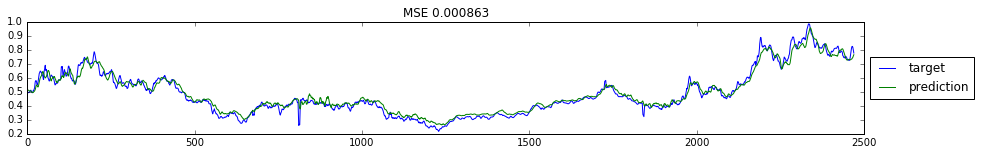

In [28]:
plt.figure(figsize=(15,2))
from sklearn.metrics import mean_squared_error
plt.title("MSE %.6f"%mean_squared_error(y_test, preds))
plt.plot(y_test, label="target")
plt.plot(preds, label="prediction")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

measure accuracy on predicting whether next price is going to be lower or higher

In [29]:
diff_ytest = y_test[1:]>y_test[:1]
diff_preds = preds[1:]>preds[:1]
print "%.3f"%(np.sum(diff_preds==diff_ytest)*1./len(diff_preds))

0.968
